In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
path_ede1 = "/data/shared/Big-Geodata-Processing-2021-1A/distributed_computing_machine_learning/Data/Tick/Tick_Dynamics_Ede_1.csv"
path_ede2 = "/data/shared/Big-Geodata-Processing-2021-1A/distributed_computing_machine_learning/Data/Tick/Tick_Dynamics_Ede_2.csv"

columns = list(range(3, 11))
m1 = np.loadtxt(path_ede1, usecols=columns, dtype=np.float, delimiter=";")
m2 = np.loadtxt(path_ede2, usecols=columns, dtype=np.float, delimiter=";")
print(m1)

[[ 3.49052e+01  1.08800e+01  2.54000e+01  0.00000e+00  4.73000e+00
   6.69900e+01  3.21000e+00  3.90000e-01]
 [ 3.15765e+01  1.51100e+01  2.51600e+01  0.00000e+00  3.54000e+00
   7.99300e+01  2.54000e+00  3.00000e-01]
 [ 2.39518e+01  1.09600e+01  1.99200e+01  7.00000e-02  1.29000e+00
   8.75400e+01  1.22000e+00  1.50000e-01]
 [ 1.52681e+01  9.31000e+00  1.65700e+01  4.44000e+00  1.30000e+00
   8.92700e+01  9.50000e-01  1.20000e-01]
 [ 7.83920e+00  6.05000e+00  1.20200e+01  0.00000e+00  4.30000e-01
   8.87100e+01  8.10000e-01  1.00000e-01]
 [ 2.76920e+00  7.06000e+00  1.06600e+01  5.80000e-01  2.30000e-01
   8.25800e+01  1.34000e+00  1.60000e-01]
 [ 5.36000e-02  6.30000e+00  9.92000e+00  3.88000e+00  1.30000e-01
   8.93600e+01  7.80000e-01  1.00000e-01]
 [ 3.75060e+00  1.05000e+00  9.94000e+00  0.00000e+00  5.10000e-01
   9.25800e+01  3.90000e-01  5.00000e-02]
 [ 8.15850e+00  3.06000e+00  9.22000e+00  6.47000e+00  8.30000e-01
   8.08000e+01  1.15000e+00  1.40000e-01]
 [ 2.25548e+01  1.2

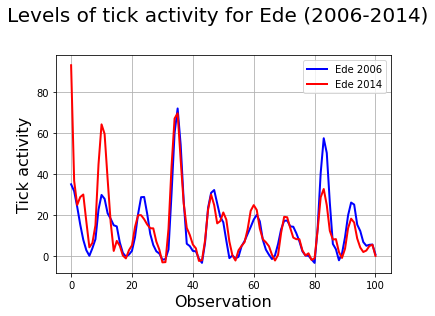

In [3]:
title= plt.suptitle("Levels of tick activity for Ede (2006-2014)", size=20)
title.set_position([.5, 1.05])
e1 = m1[:, 0]
e2 = m2[:, 0]
xlinspace = np.linspace(0, len(e1) - 1, len(e1))
plt.plot(xlinspace, e1, "b-", label="Ede 2006", linewidth=2)
plt.plot(xlinspace, e2, "r-", label="Ede 2014", linewidth=2)
plt.ylabel("Tick activity", size=16)
plt.xlabel("Observation", size=16)
plt.legend()
plt.grid()
plt.show()

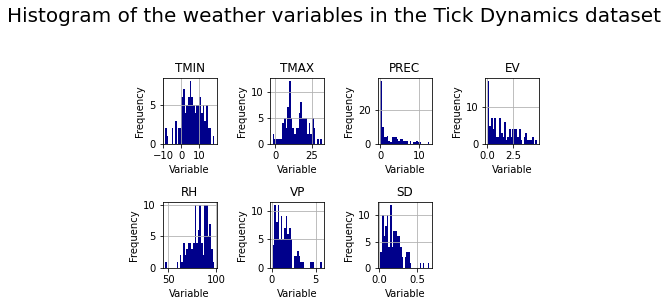

In [4]:
labels = ["TMIN", "TMAX", "PREC", "EV", "RH", "VP", "SD"]
title= plt.suptitle('Histogram of the weather variables in the Tick Dynamics dataset', size=20)
title.set_position([.5, 1.05])
plt.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(1, 8):
    current_feature = m1[:, i]
    plt.subplot(2, 4, i)
    plt.title(labels[i - 1], size=12)
    plt.hist(current_feature, bins=30, color="darkblue")
    plt.xlabel("Variable", size=10)
    plt.ylabel("Frequency", size=10)
    plt.grid()
    plt.tight_layout()
plt.show()

In [5]:
# Separate the raw matrices into X and Y
xtrain = m1[:, 1:]
ytrain = m1[:, 0]
xtest = m2[:, 1:]
ytest = m2[:, 0]

In [6]:
# # Apply RF
rf = RandomForestRegressor(n_estimators = 100, 
                           criterion = "mse", 
                           max_depth = None, 
                           max_features = "auto", 
                           bootstrap = True,
                           min_samples_split = 2, 
                           n_jobs = 1)

rf.fit(xtrain, ytrain)
ypred = rf.predict(xtest)
print("RF: ", r2_score(ytest, ypred))

zipped_rf = list (zip (labels, rf.feature_importances_))
print(zipped_rf)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:387: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RF:  0.6068712041162809
[('TMIN', 0.06808566718291646), ('TMAX', 0.17727453042641042), ('PREC', 0.09152015931353566), ('EV', 0.33272546165472033), ('RH', 0.09137220310154645), ('VP', 0.15024703441525475), ('SD', 0.08877494390561597)]


In [7]:
# Apply GBR
gb = GradientBoostingRegressor(n_estimators=100, loss="ls", learning_rate=0.1, criterion="friedman_mse")
gb.fit(xtrain, ytrain)
ypred = gb.predict(xtest)
print("GB: ", r2_score(ytest, ypred))

zipped_gb = list (zip (labels, gb.feature_importances_))
print(zipped_gb)

GB:  0.623882721832214
[('TMIN', 0.11501563245955564), ('TMAX', 0.11239502496292454), ('PREC', 0.1229717709300215), ('EV', 0.30800681902946775), ('RH', 0.05483658093977897), ('VP', 0.27420364540900244), ('SD', 0.012570526269249285)]


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


In [7]:
# Testing for the CSV file of the Netherlands
path_nl = "/data/shared/Big-Geodata-Processing-2021-1A/distributed_computing_machine_learning/Data/Tick/NL_Weather_15_06_14.csv"
xtestnl = np.loadtxt(path_nl, usecols=list(range(3, 10)), dtype=np.float, delimiter=";")
metadata = np.loadtxt(path_nl, usecols=(0, 1, 2), dtype=np.float, delimiter=";")

In [13]:
yprednl = rf.predict(xtestnl).reshape(-1, 1)
yprednl = np.array(yprednl, int)
metadata = np.array(metadata, int)
stack = np.hstack((metadata, yprednl))
print(yprednl)
print(metadata)
print(stack)

[[25]
 [25]
 [25]
 ...
 [21]
 [21]
 [21]]
[[ 8309    27   209]
 [ 8310    27   210]
 [ 8311    27   211]
 ...
 [94680   315   180]
 [94980   316   180]
 [95585   318   185]]
[[ 8309    27   209    25]
 [ 8310    27   210    25]
 [ 8311    27   211    25]
 ...
 [94680   315   180    21]
 [94980   316   180    21]
 [95585   318   185    21]]


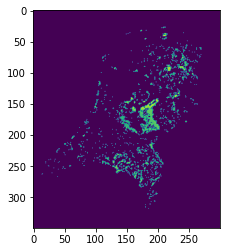

In [20]:
def place_pixel(stack):
    placed = np.multiply(np.ones((350, 300)), -1)
    for position in stack:
        row = position[1]
        col = position[2]
        value = position[3]
        placed[row, col] = value
    return placed

map = place_pixel(stack)

plt.imshow(map)

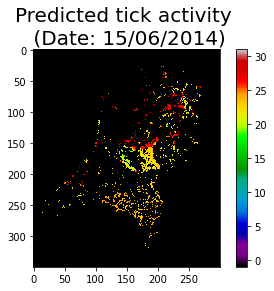

In [19]:
plt.clf()
plt.title("Predicted tick activity \n (Date: 15/06/2014)", size = 20)

plt.imshow(map,
           interpolation = "None", 
           cmap = plt.get_cmap("nipy_spectral"))

plt.colorbar()
plt.show()